# Ejercicio 1
# Principios de probabilidad 
$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$


Este ejercicio consiste en mostrar todas las posibles probabilidades marginales y conjuntas dados que se conocen la lista de eventos y los priors, para la caja roja con 6 naranjas y 2 manzanas y para la caja azul con 3 manzanas y 1 naranja.

In [18]:
import numpy as np

def mybayes(list_even, priors):
    """
    Estimación posterior utilizando el teorema de Bayes para dos variables aleatorias.
    """
    nB = len(list_even)  # Número de variables aleatorias (en este caso, el número de cajas)
    priors_ = np.array(priors)  # Convertir los priors a un array de numpy para facilitar los cálculos
    even = []  # Lista para almacenar los posibles valores de las variables aleatorias
    likelihoods = []  # Lista para almacenar las verosimilitudes

    # Estimar verosimilitudes para cada variable aleatoria (caja)
    for b in range(nB):
        unique_values, counts = np.unique(list_even[b], return_counts=True)  # Encontrar valores únicos y contar ocurrencias
        even.append(unique_values)  # Almacenar los valores únicos
        likelihoods.append(counts / np.sum(counts))  # Calcular verosimilitudes y almacenarlas

    # Calcular probabilidades marginales p(B=r) y p(B=b)
    p_B_r = priors_[0]
    p_B_b = priors_[1]

    # Calcular probabilidades condicionales p(B=r|f=o), p(B=b|f=o), p(B=r|f=a), p(B=b|f=a)
    p_B_r_given_o = likelihoods[0][1] * p_B_r / (likelihoods[0][1] * p_B_r + likelihoods[1][1] * p_B_b)
    p_B_b_given_o = likelihoods[1][1] * p_B_b / (likelihoods[0][1] * p_B_r + likelihoods[1][1] * p_B_b)
    p_B_r_given_a = likelihoods[0][0] * p_B_r / (likelihoods[0][0] * p_B_r + likelihoods[1][0] * p_B_b)
    p_B_b_given_a = likelihoods[1][0] * p_B_b / (likelihoods[0][0] * p_B_r + likelihoods[1][0] * p_B_b)

    # Devolver los resultados como un diccionario
    return {
        "p(f=o)": likelihoods[0][1],  # Probabilidad marginal p(f=o)
        "p(f=a)": likelihoods[0][0],  # Probabilidad marginal p(f=a)
        "p(B=r)": p_B_r,  # Probabilidad marginal p(B=r)
        "p(B=b)": p_B_b,  # Probabilidad marginal p(B=b)
        "p(B=r|f=o)": p_B_r_given_o,  # Probabilidad condicional p(B=r|f=o)
        "p(B=b|f=o)": p_B_b_given_o,  # Probabilidad condicional p(B=b|f=o)
        "p(B=r|f=a)": p_B_r_given_a,  # Probabilidad condicional p(B=r|f=a)
        "p(B=b|f=a)": p_B_b_given_a   # Probabilidad condicional p(B=b|f=a)
    }

# Datos de entrada
list_even = [[1, 1, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0]]  # Datos sobre las frutas en cada caja
priors = [0.4, 0.6]  # Probabilidades a priori de elegir cada caja

# Calcular probabilidades utilizando la función definida
probabilidades = mybayes(list_even, priors)

# Imprimir los resultados
for key, value in probabilidades.items():
    print(key, ":", value)

p(f=o) : 0.25
p(f=a) : 0.75
p(B=r) : 0.4
p(B=b) : 0.6
p(B=r|f=o) : 0.18181818181818185
p(B=b|f=o) : 0.8181818181818182
p(B=r|f=a) : 0.6666666666666666
p(B=b|f=a) : 0.33333333333333326


# Ejercicio 2
# Para n frutas y n cajas  

Este ejercicio consiste en mostrar todas las posibles probabilidades marginales y conjuntas dados que se conocen la lista de eventos y los priors, para n cajas y n frutas.

In [6]:
import numpy as np

def mybayes(list_event, priors):
    """
    Estimación posterior desde Bayes 
    """
    
    # Número de cajas
    nB = len(list_event)
    
    # Eventos de cada caja
    even_ = np.zeros(nB)
    
    # Encontrar todas las frutas distintas
    frutas = set()
    for sublista in list_event:
        frutas.update(sublista)
    frutas = list(frutas)
    
    # Calcular probabilidades marginales de cada fruta
    marginales = np.zeros(len(frutas))
    for i, fruta in enumerate(frutas):
        marginales[i] = sum([priors[b] * list_event[b].count(fruta) / len(list_event[b]) for b in range(nB)])
        print(f'P(F={fruta}) = {marginales[i]:.4f}')
    
    # Calcular las probabilidades condicionales
    for b in range(nB):
        # Total de frutas en la caja b
        num_total = len(list_event[b])
        
        for fruta in np.unique(list_event[b]):
            index_fruta = frutas.index(fruta)
            num_veces_f = list_event[b].count(fruta)  # Cuántas veces la fruta fruta está en la caja b-ésima 
                
            verosim = num_veces_f / num_total 
            posterior = (verosim * priors[b]) / marginales[index_fruta]
            print(f'P(B = {chr(65+b)} | F={fruta}) = {posterior:.4f}')

In [7]:
list_event = [[1,1,0,0,0,0,0,0], [1,1,1,0,2,2], [2,1,0]]
priors = np.array([0.3, 0.6, 0.1])

mybayes(list_event, priors)

P(F=0) = 0.3583
P(F=1) = 0.4083
P(F=2) = 0.2333
P(B = A | F=0) = 0.6279
P(B = A | F=1) = 0.1837
P(B = B | F=0) = 0.2791
P(B = B | F=1) = 0.7347
P(B = B | F=2) = 0.8571
P(B = C | F=0) = 0.0930
P(B = C | F=1) = 0.0816
P(B = C | F=2) = 0.1429


In [3]:
import numpy as np

def mybayes():
    """
    Estimación posterior desde Bayes 
    """
    # Pedir al usuario la lista de eventos
    list_event = []
    nB = int(input("Ingrese el número de cajas: "))
    for i in range(nB):
        eventos = input(f"Ingrese los eventos para la caja {chr(65+i)} separados por espacios: ").split()
        eventos = [int(e) for e in eventos]
        list_event.append(eventos)
    
    # Pedir al usuario los priors
    priors = []
    for i in range(nB):
        prior = float(input(f"Ingrese el prior para la caja {chr(65+i)}: "))
        priors.append(prior)
    priors = np.array(priors)
    
    # Convertir la lista de eventos en un arreglo de NumPy para un mejor rendimiento
    list_event = np.array(list_event)
    
    # Encontrar todas las frutas distintas
    frutas = np.unique(np.concatenate(list_event))
    
    # Calcular las probabilidades marginales de cada fruta
    marginales = np.array([sum(priors[b] * (list_event[b] == fruta).mean() for b in range(nB)) for fruta in frutas])
    print("Probabilidades marginales:")
    for i, fruta in enumerate(frutas):
        print(f'P(F={fruta}) = {marginales[i]:.4f}')
    
    # Calcular las probabilidades condicionales
    for b in range(nB):
        # Total de frutas en la caja b
        num_total = len(list_event[b])
        
        for fruta in np.unique(list_event[b]):
            num_veces_f = np.sum(list_event[b] == fruta)  # Cuántas veces la fruta está en la caja b-ésima 
                
            verosim = num_veces_f / num_total 
            posterior = (verosim * priors[b]) / marginales[np.where(frutas == fruta)[0][0]]
            print(f'P(B = {chr(65+b)} | F={fruta}) = {posterior:.4f}')

mybayes()


Ingrese el número de cajas:  3
Ingrese los eventos para la caja A separados por espacios:  1 1 0 0 0
Ingrese los eventos para la caja B separados por espacios:  1 0 1 0 1
Ingrese los eventos para la caja C separados por espacios:  1 0 1 0 1
Ingrese el prior para la caja A:  0.4
Ingrese el prior para la caja B:  0.3
Ingrese el prior para la caja C:  0.3


Probabilidades marginales:
P(F=0) = 0.4800
P(F=1) = 0.5200
P(B = A | F=0) = 0.5000
P(B = A | F=1) = 0.3077
P(B = B | F=0) = 0.2500
P(B = B | F=1) = 0.3462
P(B = C | F=0) = 0.2500
P(B = C | F=1) = 0.3462


# Ejercicio 3: 
# Distribuciones Gaussianas



En este ejercicio consiste en generar una simulacion x y y datos, generando las graficas del PDF y su respectiva distribución gaussiana. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Generación de datos sintéticos aleatorias de una distribución normal 

m1 = 0.1
v1 = 0.8 
n1 = 100
x1 =np.random.normal(m1,v1, n1)

m2 = 1.5
v2 = 0.6
n2 = 80
x2 =np.random.normal(m2,v2,n2)

m_y1 = 0.5
v_y1 = 0.15
n_y1 = n1
y1 = np.random.normal(m_y1,v_y1, n_y1)

m_y2 = 1.5
v_y2 = 0.15
n_y2 = n2
y2 = np.random.normal(m_y2,v_y2, n_y2)

In [3]:
## P(Y)

# Creamos una lista llamada ind_y1 que contiene los índices de los elementos en la lista y1 que son menores que 1.
ind_y1 = [i for i, valor in enumerate(y1) if valor < 1]

# Calculamos la probabilidad P(Y=1) contando la longitud de la lista ind_y1.
P_y1 = len(ind_y1)

# Creamos una lista llamada ind_y2 que contiene los índices de los elementos en la lista y2 que son mayores o iguales que 1.
ind_y2 = [i for i, valor in enumerate(y2) if valor >= 1]

# Calculamos la probabilidad P(Y=2) contando la longitud de la lista ind_y2.
P_y2 = len(ind_y2)

# P(X)

# Primero combinamos las listas x1 y x2 en una sola lista llamada X.
X = np.concatenate((x1, x2))

# Calculamos la distancia entre los valores máximo y mínimo de X, y luego la dividimos en 9 subintervalos.
dist = np.abs(max(X) - min(X)) / 9

# Inicializamos una lista de ceros llamada P_X con longitud 9.
P_X = np.zeros(9)

# Llenamos la lista P_X con las probabilidades de que un elemento de X caiga en cada subintervalo.
for i in range(len(P_X)):
    # Sumamos 1 por cada elemento en X que cae dentro del subintervalo correspondiente, y luego dividimos por la longitud de X.
    P_X[i] = sum(1 for elemento in X if min(X) + i * dist < elemento < min(X) + (i + 1) * dist) / len(X)

# P(X|Y=1)

# Inicializamos una lista de ceros llamada P_XY1 con longitud 9.
P_XY1 = np.zeros(9)

# Llenamos la lista P_XY1 con las probabilidades de que un elemento de x1 caiga en cada subintervalo dado que Y=1.
for i in range(len(P_XY1)):
    # Sumamos 1 por cada elemento en x1 que cae dentro del subintervalo correspondiente, y luego dividimos por la longitud de x1.
    P_XY1[i] = sum(1 for elemento in x1 if min(x1) + i * dist < elemento < min(x1) + (i + 1) * dist) / len(x1)


In [4]:
# Función que devuele la distribución normal/gaussiana

def dist_normal(mu, varianza, x):
    exponente = -((x - mu) ** 2) / (2 * varianza)   # devuelve otro vector, ya que a cada elemento se le resta la media y cada elemento se eleva al cuadrado
    coeficiente = 1 / np.sqrt(2 * np.pi * varianza) # Ej: x - mu = [1,2,4] - 2 = [-1,0,2]
    return coeficiente * np.exp(exponente)

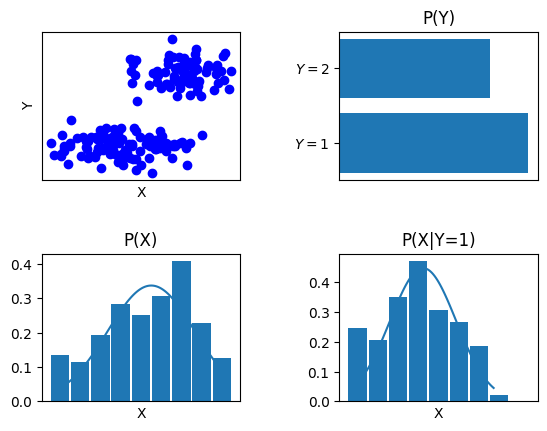

In [10]:
fig, axs = plt.subplots(2,2)
axs[0,0].scatter(x1, y1, c = 'b')
axs[0,0].scatter(x2, y2, c = 'b')
axs[0,0].set_xticks([])
axs[0,0].set_xlabel('X')
axs[0,0].set_yticks([])
axs[0,0].set_ylabel('Y')

# P(Y)
axs[0,1].barh(["$Y=1$", "$Y=2$"], [P_y1, P_y2])
axs[0,1].set_title("P(Y)")
axs[0,1].set_xticks([])

# P(X)
ejeX = np.linspace(min(X),max(X),100)
distri = np.linspace(min(X), max(X), len(P_X))
axs[1,0].plot(ejeX, dist_normal((m1+m2)/2,v1+v2,ejeX))
axs[1,0].bar(distri, P_X, width=0.5)
axs[1,0].set_xticks([])
axs[1,0].set_xlabel('X')
axs[1,0].set_title("P(X)")


# P(X|Y=1)
ejeX2 = np.linspace(min(x1), max(x1),100)
axs[1,1].plot(ejeX2, dist_normal(m1,v1,ejeX2))
axs[1,1].bar(distri, P_XY1, width = 0.5)
axs[1,1].set_xticks([])
axs[1,1].set_xlabel('X')
axs[1,1].set_title("P(X|Y=1)")

plt.subplots_adjust(wspace=0.5, hspace=0.5)

Manera optimizada:

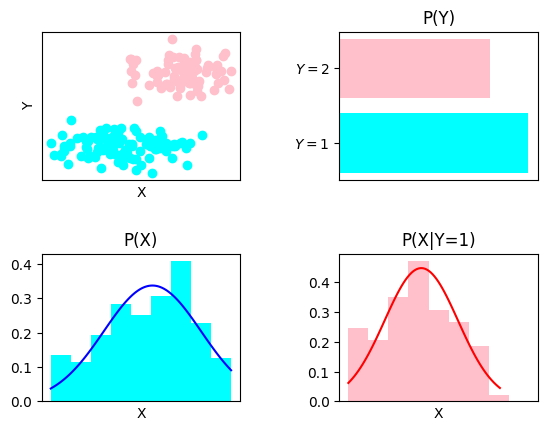

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generación de datos sintéticos aleatorios de una distribución normal
m1 = 0.1
v1 = 0.8 
n1 = 100
x1 = np.random.normal(m1, v1, n1)

m2 = 1.5
v2 = 0.6
n2 = 80
x2 = np.random.normal(m2, v2, n2)

m_y1 = 0.5
v_y1 = 0.15
n_y1 = n1
y1 = np.random.normal(m_y1, v_y1, n_y1)

m_y2 = 1.5
v_y2 = 0.15
n_y2 = n2
y2 = np.random.normal(m_y2, v_y2, n_y2)

# P(Y)
# Contamos el número de valores en y1 menores que 1 para obtener P(Y=1)
P_y1 = np.sum(y1 < 1)
# Contamos el número de valores en y2 mayores o iguales que 1 para obtener P(Y=2)
P_y2 = np.sum(y2 >= 1)

# P(X)
# Combinamos los datos de x1 y x2 en un solo conjunto de datos X
X = np.concatenate((x1, x2))
# Calculamos el histograma de X con 9 bins y normalizamos para obtener P(X)
P_X, bins = np.histogram(X, bins=9, density=True)

# P(X|Y=1)
# Calculamos el histograma de x1 usando los mismos bins que X para obtener P(X|Y=1)
P_XY1, _ = np.histogram(x1, bins=bins, density=True)

# Función que devuelve la distribución normal/gaussiana
def dist_normal(mu, varianza, x):
    exponente = -((x - mu) ** 2) / (2 * varianza)
    coeficiente = 1 / np.sqrt(2 * np.pi * varianza)
    return coeficiente * np.exp(exponente)

# Gráfica
fig, axs = plt.subplots(2, 2)

# Scatter plot
axs[0, 0].scatter(x1, y1, c='cyan')  
axs[0, 0].scatter(x2, y2, c='pink')    
axs[0, 0].set_xticks([])
axs[0, 0].set_xlabel('X')
axs[0, 0].set_yticks([])
axs[0, 0].set_ylabel('Y')

# P(Y)
axs[0, 1].barh(["$Y=1$", "$Y=2$"], [P_y1, P_y2], color=['cyan', 'pink'])  
axs[0, 1].set_title("P(Y)")
axs[0, 1].set_xticks([])

# P(X)
ejeX = np.linspace(min(X), max(X), 100)
axs[1, 0].plot(ejeX, dist_normal((m1+m2)/2, v1+v2, ejeX), color='blue')  
axs[1, 0].bar((bins[:-1] + bins[1:]) / 2, P_X, width=bins[1] - bins[0], color='cyan')  
axs[1, 0].set_xticks([])
axs[1, 0].set_xlabel('X')
axs[1, 0].set_title("P(X)")

# P(X|Y=1)
ejeX2 = np.linspace(min(x1), max(x1), 100)
axs[1, 1].plot(ejeX2, dist_normal(m1, v1, ejeX2), color='red')  
axs[1, 1].bar((bins[:-1] + bins[1:]) / 2, P_XY1, width=bins[1] - bins[0], color='pink')  
axs[1, 1].set_xticks([])
axs[1, 1].set_xlabel('X')
axs[1, 1].set_title("P(X|Y=1)")

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()